In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

 55000 10000 5000

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


In [2]:
learning_rate = 0.001 # 학습율
epochs = 30 # 반복횟수
batch_size = 100 # 한번에 입력으로 주어지는 MNIST 개수

In [3]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28X28X1 (black/white)


T = tf.placeholder(tf.float32, [None, 10])  

In [4]:
# 1번째 컨볼루션 층, 5X5X32 필터
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# 완전연결층, 14X14X32 개 입력 출력은 256개 의 은닉층 개념
A2_flat = P2_flat = tf.reshape(A2, [-1, 14*14*32])

W3 = tf.Variable(tf.random_normal([14*14*32, 256], stddev=0.01))
b3 = tf.Variable(tf.random_normal([256]))

Z3 = tf.matmul(A2_flat, W3) + b3

A3 = tf.nn.relu(Z3)

In [6]:
W4 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01))

b4 = tf.Variable(tf.random_normal([10]))

Z4 = logits = tf.matmul(A3, W4) + b4

y = A4 = tf.nn.softmax(Z4)

In [7]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Z4, labels = T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [8]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A4, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A4, 1)

In [9]:
save_file = './train_model.ckpt'
saver = tf.train.Saver()
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 50 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    saver.save(sess, save_file)

epochs =  0 , step =  0 , loss_val =  2.9489434
epochs =  0 , step =  100 , loss_val =  0.47301677
epochs =  0 , step =  200 , loss_val =  0.24492297
epochs =  0 , step =  300 , loss_val =  0.14454538
epochs =  0 , step =  400 , loss_val =  0.14683235
epochs =  0 , step =  500 , loss_val =  0.0894254
epochs =  1 , step =  0 , loss_val =  0.056717668
epochs =  1 , step =  100 , loss_val =  0.12429039
epochs =  1 , step =  200 , loss_val =  0.15607744
epochs =  1 , step =  300 , loss_val =  0.059757862
epochs =  1 , step =  400 , loss_val =  0.11255017
epochs =  1 , step =  500 , loss_val =  0.030963188
epochs =  2 , step =  0 , loss_val =  0.04122034
epochs =  2 , step =  100 , loss_val =  0.065564916
epochs =  2 , step =  200 , loss_val =  0.029123891
epochs =  2 , step =  300 , loss_val =  0.048601698
epochs =  2 , step =  400 , loss_val =  0.1617583
epochs =  2 , step =  500 , loss_val =  0.084568255
epochs =  3 , step =  0 , loss_val =  0.041919574
epochs =  3 , step =  100 , loss_v

epochs =  26 , step =  0 , loss_val =  0.0001900597
epochs =  26 , step =  100 , loss_val =  2.3359682e-05
epochs =  26 , step =  200 , loss_val =  4.5823017e-05
epochs =  26 , step =  300 , loss_val =  7.364824e-05
epochs =  26 , step =  400 , loss_val =  2.751083e-05
epochs =  26 , step =  500 , loss_val =  0.00012844981
epochs =  27 , step =  0 , loss_val =  3.1106243e-05
epochs =  27 , step =  100 , loss_val =  2.8278822e-05
epochs =  27 , step =  200 , loss_val =  0.0060794177
epochs =  27 , step =  300 , loss_val =  1.1408678e-05
epochs =  27 , step =  400 , loss_val =  9.3934956e-05
epochs =  27 , step =  500 , loss_val =  0.00042885766
epochs =  28 , step =  0 , loss_val =  0.00040789216
epochs =  28 , step =  100 , loss_val =  0.0009904021
epochs =  28 , step =  200 , loss_val =  0.002331118
epochs =  28 , step =  300 , loss_val =  0.00041075464
epochs =  28 , step =  400 , loss_val =  0.0015571845
epochs =  28 , step =  500 , loss_val =  0.0056060315
epochs =  29 , step =  0 

In [10]:
with  tf.Session()  as sess:
    saver.restore(sess, save_file)
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./train_model.ckpt

Accuracy =  0.9884
type(accuracy_val) =  <class 'numpy.float32'> , type(predicted_list_val) =  <class 'numpy.ndarray'> , type(index_label) =  <class 'numpy.ndarray'>
index_label.shape =  (10000,)
length of index_label_list =  10000
false label count =  116

length of index_label_false_list 116


In [11]:
print(index_label_prediction_list)

[[18, 3, 8], [247, 4, 2], [259, 6, 0], [321, 2, 7], [445, 6, 0], [582, 8, 2], [646, 2, 4], [740, 4, 9], [939, 2, 0], [947, 8, 9], [965, 6, 0], [1014, 6, 5], [1033, 8, 1], [1039, 7, 1], [1128, 3, 7], [1156, 7, 8], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1260, 7, 1], [1319, 8, 0], [1393, 5, 3], [1414, 9, 4], [1425, 8, 4], [1522, 7, 9], [1530, 8, 7], [1678, 2, 0], [1717, 8, 0], [1790, 2, 7], [1901, 9, 4], [2035, 5, 3], [2070, 7, 9], [2098, 2, 0], [2118, 6, 0], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2182, 1, 2], [2280, 3, 9], [2293, 9, 4], [2387, 9, 1], [2462, 2, 0], [2560, 3, 2], [2597, 5, 3], [2607, 7, 8], [2648, 9, 5], [2654, 6, 1], [2720, 9, 4], [2743, 5, 8], [2770, 3, 7], [2896, 8, 0], [2921, 3, 2], [2945, 3, 9], [2995, 6, 8], [3030, 6, 0], [3073, 1, 2], [3225, 7, 9], [3330, 2, 8], [3422, 6, 0], [3451, 7, 9], [3503, 9, 1], [3520, 6, 4], [3534, 4, 8], [3558, 5, 0], [3559, 8, 5], [3727, 8, 9], [3751, 7, 2], [3808, 7, 8], [3853, 6, 0], [3951, 8, 0], [4163, 9, 0], [4176, 2, 7], [41

10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
100 image is saved now
110 image is saved now
Elapsed Time =  0:00:32.500308
Total  116  data is saved


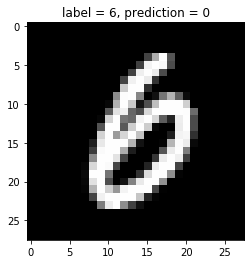

In [13]:
# check false data
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

save_count = 0

# 현재 디렉토리 저장
curr_dir = os.getcwd()

#image 저장할 디렉토리 생성, 현재 시간으로 생성
now = datetime.now()
algorithm_name = 'CNN_1Conv_Adam_'
dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' +str(now.day) + '-' + str(now.hour) + str(now.minute) + str(now.second)

os.mkdir(dir_name)

# change dir
os.chdir(dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
    
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)
    plt.imshow(img, cmap = 'gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + ', prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')
        
end_time = datetime.now()

print('Elapsed Time = ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래 dir 로 복귀
os.chdir(curr_dir)